In [1]:
import pandas as pd
import numpy as np
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### 1. NASDAQ.AAPL

In [4]:
#Stock analysis of NASDAQ.AAPL
stockname="NASDAQ.AAPL"
from datetime import datetime
date=pd.date_range("2000-01-01", periods=100,freq='B').to_pydatetime().tolist()
date=pd.DataFrame(date,columns=["DATE"])
stock=pd.DataFrame()
stock=pd.DataFrame(data[stockname][41166:41266])
date=date.reset_index(drop=True)
stock=stock.reset_index(drop=True)
aapl=pd.concat([date,stock],axis=1)

In [37]:
stock=pd.DataFrame(data[stockname][41166:41266])
stock

,NASDAQ.AAPL
41166,163.8000
41167,163.8075
41168,163.8500
41169,163.8400
41170,163.8200
41171,163.8350
41172,163.8300
41173,163.7863
41174,163.8462
41175,163.8600


In [38]:
aapl=pd.concat([date,stock],axis=1)
aapl

,DATE,NASDAQ.AAPL
0,2000-01-03,NaN
1,2000-01-04,NaN
2,2000-01-05,NaN
3,2000-01-06,NaN
4,2000-01-07,NaN
5,2000-01-10,NaN
6,2000-01-11,NaN
7,2000-01-12,NaN
8,2000-01-13,NaN
9,2000-01-14,NaN


In [5]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
DATE           100 non-null datetime64[ns]
NASDAQ.AAPL    100 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [6]:
aapl.DATE = pd.to_datetime(aapl.DATE)
aapl.set_index('DATE', inplace=True)
print(aapl.head(5))
print(aapl.tail(5))

            NASDAQ.AAPL
DATE                   
2000-01-03     163.8000
2000-01-04     163.8075
2000-01-05     163.8500
2000-01-06     163.8400
2000-01-07     163.8200
            NASDAQ.AAPL
DATE                   
2000-05-15       164.11
2000-05-16       164.12
2000-05-17       164.01
2000-05-18       163.88
2000-05-19       163.98


Text(0.5, 0, 'Year')

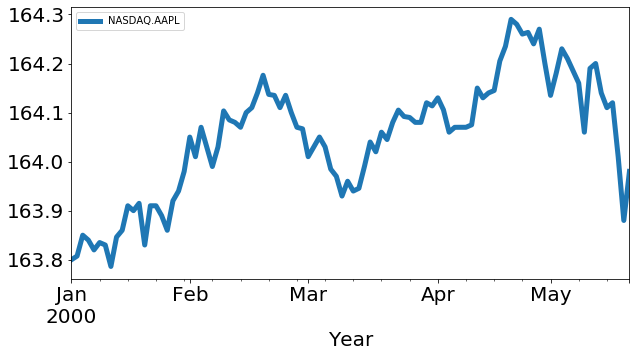

In [8]:
aapl.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [9]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,100.0,164.04984,0.123607,163.7863,163.9675,164.07,164.135,164.29


In [30]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(aapl,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lags Used','Number of Observations Used'])
dfoutput


Test Statistics                -2.329267
p-value                         0.162702
Lags Used                       0.000000
Number of Observations Used    99.000000
dtype: float64

Text(0.5, 0, 'Year')

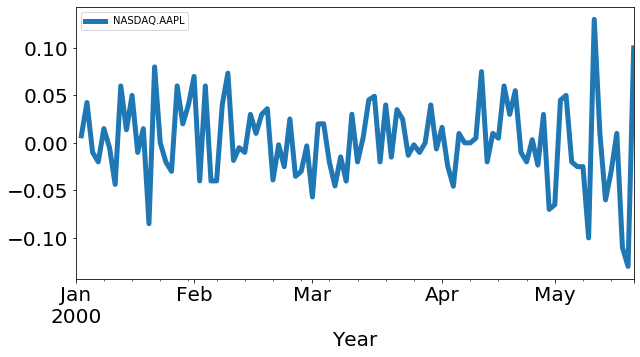

In [12]:
#Differencing Differencing is a decomposition process through which trend and seasonality are eliminated. Here, we usually take the difference of observation with particular instant with previous instant.

#First-order differencing
aapl.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)


Text(0.5, 1.0, 'AAPL Cumulative Returns')

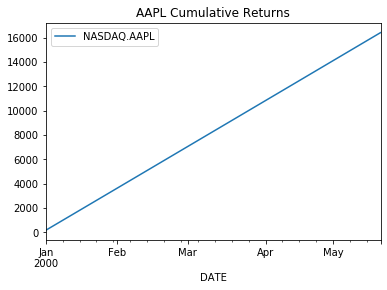

In [13]:
# Comulative Return
dr = aapl.cumsum()
dr.plot()
plt.title('AAPL Cumulative Returns')

Text(0.5, 1.0, 'AAPL Autocorrelation plot')

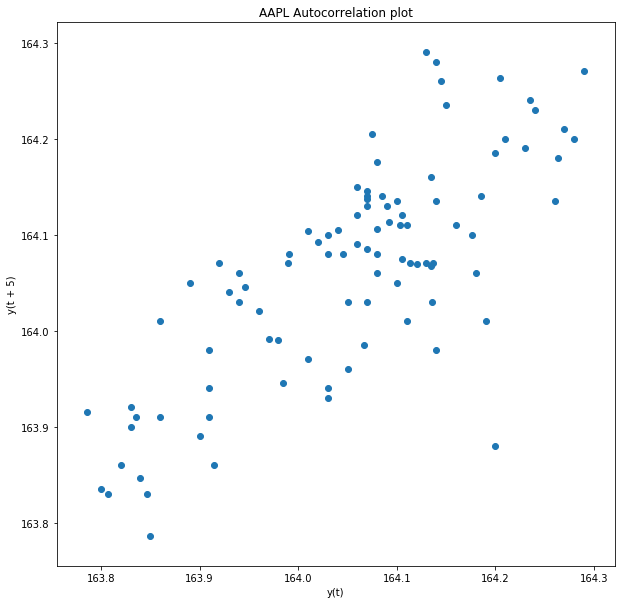

In [14]:
plt.figure(figsize=(10,10))
lag_plot(aapl[stockname], lag=5)
plt.title('AAPL Autocorrelation plot')

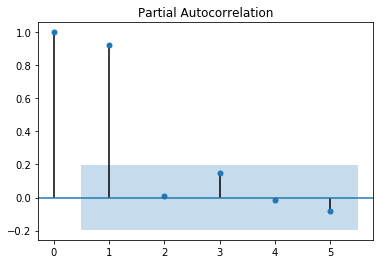

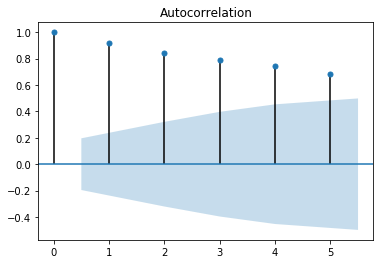

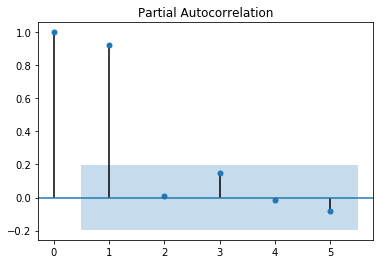

In [16]:
  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(aapl[stockname], lags=5)
plot_pacf(aapl[stockname], lags=5)

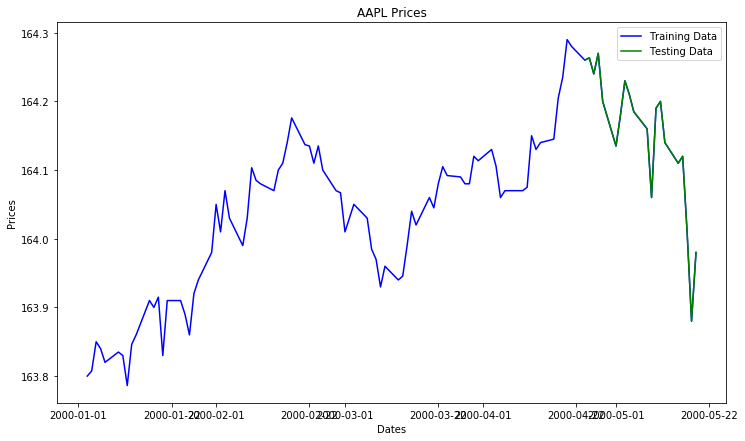

In [17]:
train_data, test_data = aapl[0:int(len(aapl)*0.8)], aapl[int(len(aapl)*0.8):]
plt.figure(figsize=(12,7))
plt.title('AAPL Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(aapl[stockname], 'blue', label='Training Data')
plt.plot(test_data[stockname], 'green', label='Testing Data')
plt.legend()

In [18]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data[stockname].values
test_ar = test_data[stockname].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.005
Symmetric mean absolute percentage error: 0.062


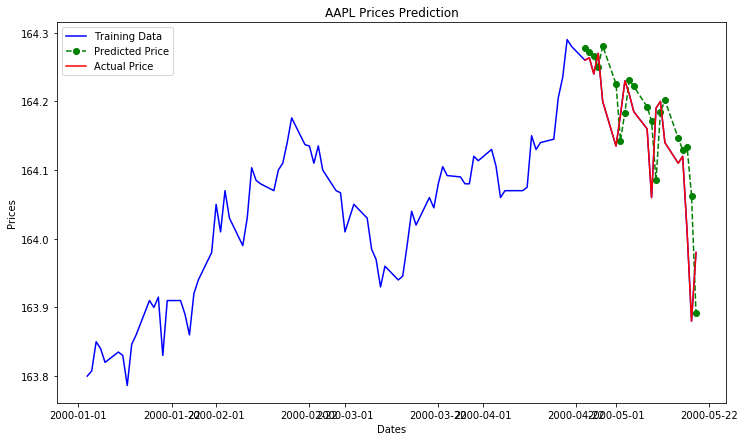

In [19]:
plt.figure(figsize=(12,7))
plt.plot(aapl[stockname],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data[stockname], color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

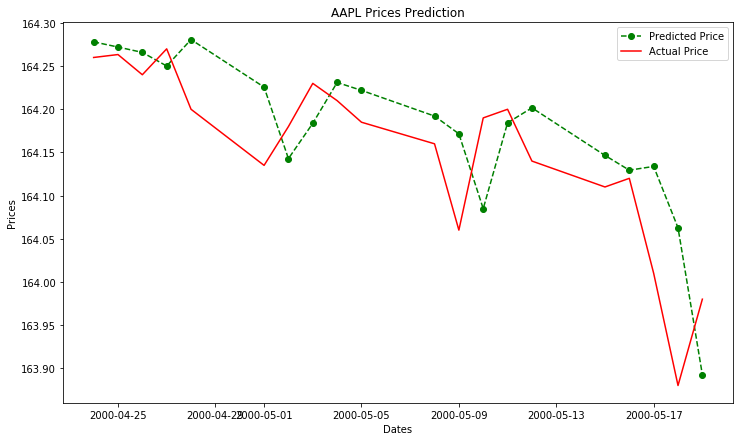

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data[stockname], color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [21]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

     Actual   Predicted
0  164.2600  164.278116
1  164.2634  164.272082
2  164.2400  164.265898
3  164.2700  164.250140
4  164.2000  164.280739
5  164.1350  164.225663
6  164.1800  164.142859
7  164.2300  164.183730
8  164.2100  164.231064
9  164.1850  164.221903
